In [ ]:
# STEP 1: Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Adjust this path based on where you saved the copy
source_path = "/content/drive/My Drive/DataforDissertation/Contracts.txt"   # 👈 Your full folder
target_path = "/content/Contracts"

shutil.copytree(source_path, target_path)

print(f"✅ All files copied to: {target_path}")

✅ All files copied to: /content/Contracts


**DISTILBERT** without labeled categorized final data

In [ ]:
import os
import pandas as pd

# Path to your contracts folder
contracts_folder = "/content/Contracts"

# List to store file data
data = []

# Loop through each .txt file in the folder
for fname in os.listdir(contracts_folder):
    if fname.endswith('.txt'):
        file_path = os.path.join(contracts_folder, fname)
        with open(file_path, encoding='utf-8', errors='ignore') as f:
            text = f.read()
        # Save filename and contract text
        data.append({"file_name": fname, "text": text})

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV (for later use in ML)
df.to_csv('/content/contracts_texts.csv', index=False)

print("Extracted text from contracts and saved to /content/contracts_texts.csv")
df.head()

Extracted text from contracts and saved to /content/contracts_texts.csv


,file_name,text
0,CardlyticsInc_20180112_S-1_EX-10.16_11002987_E...,SCHEDULE B\n\nCustomization Schedule\n\nThis C...
1,ULTRAGENYXPHARMACEUTICALINC_12_23_2013-EX-10.9...,Exhibit 10.9\n\nSUPPLY AGREEMENT\n\nbetween\n\...
2,ON4COMMUNICATIONSINC_07_02_2009-EX-10.1-PROMOT...,925 West Georgia Street Suite 1820 Vancouver...
3,INTERNATIONALFASTFOODCORP_04_04_1997-EX-99-FRA...,FRANCHISE AGREEMENT\n\n ...
4,CORIOINC_07_20_2000-EX-10.5-LICENSE AND HOSTIN...,1 ...


In [ ]:
import pandas as pd

# Load contract texts
df = pd.read_csv('/content/contracts_texts.csv')

# Your FINAL keyword dictionary (replace here if updated)
category_keywords = {
    "IP": ["INTELLECTUAL PROPERTY AGREEMENT", "INTELLECTUAL PROPERTY RIGHTS AGREEMENT"],
    "COLLABORATION": ["COOPERATION AGREEMENT", "COLLABORATION AGREEMENT","Cooperation Agreement", "Collaborative Development and Commercialization Agreement", "Collaboration Agreement"],
    "AFFILIATE AGREEMENTS": ["AFFILIATE AGREEMENT", "AFFILIATE", "Affiloate Program"],
    "AGENCY AGREEMENTS": ["AGENCY AGREEMENT", "Agency Agreement"],
    "CO-BRANDING": ["CO-BRANDING AGREEMENT","CO-BRANDING Agreement", "CO-BRANDING CONTENT", "CO-BRANDING"],
    "CONSULTING AGREEMENTS": ["CONSULTING AGREEMENT"],
    "DEVELOPMENT": ["DEVELOPMENT AGREEMENT","DEVELOPMENT", "Development Agreement", "DEVELOPMENT AND OPTION AGREEMENT"],
    "DISTRIBUTOR": ["DISTRIBUTOR AGREEMENT", "Distributor Agreement", "Distributorship agreement", "DISTRIBUTION AGREEMENT", "DISTRIBUTORSHIP AGREEMENT"],
    "ENDORSEMENT": ["ENDORSEMENT AGREEMENT", "Endorsement Agreement", "ENDORSEMENT"],
    "FRANCHISE": ["FRANCHISE AGREEMENT", "Franchisor", "Franchise Agreement"],
    "HOSTING": ["HOSTING AGREEMENT", "Hosting Agreement", "HOSTING", "ESCROW"],
    "JOINT VENTURE": ["JOINT VENTURE AGREEMENT", "JOINT FILING AGREEMENT", "JOINT FILING", "JOINT VENTURE"],
    "LICENSE AGREEMENTS": ["LICENSE AGREEMENT", "License Agreement", "CONTENT LICENSE", "Content License Agreement", "LICENSING", "licensees"],
    "MAINTENANCE": ["Maintenance Agreement", "MAINTENANCE AGREEMENT", "Maintenance"],
    "MANUFACTURING": ["MANUFACTURING AGREEMENT", "MANUFACTURING"],
    "MARKETING": ["MARKETING AGREEMENT", "MARKETING", "Marketing Agreement"],
    "NON-COMPETE NON-SOLICIT": ["NON-COMPETITION AND NON-SOLICITATION AGREEMENT", "NON-COMPETITION AGREEMENT", "NON COMPETITION AGREEMENT"],
    "OUTSOURCING": ["Outsourcing Agreement", "OUTSOURCING AGREEMENT", "Outsourcing Contract"],
    "PROMOTION": ["PROMOTION AGREEMENT","Promotion Agreement"],
    "RESELLER": ["RESELLER AGREEMENT", "Reseller Agreement"],
    "SERVICE": ["SERVICES AGREEMENT", "SERVICING AGREEMENT", "SERVICE AGREEMENT", "Service Agreement", "Services Agreement"],
    "SPONSORSHIP": ["SPONSORSHIP AGREEMENT", "SPONSORSHIP", "Sponsorship Agreement"],
    "STRATEGIC ALLIANCE": ["STRATEGIC ALLIANCE AGREEMENT", "Strategic Alliance Agreement"],
    "SUPPLY": ["SUPPLY AGREEMENT", "Supply Agreement", "SUPPLY CONTRACT"],
    "TRANSPORTATION": ["Transportation Agreement", "TRANSPORTATION SERVICES AGREEMENT", "TRANSPORTATION", "TRANSPORTATION SERVICE AGREEMENT"]
}

def categorize_text_exact(text, category_keywords, header_chars=2000):
    header = text[:header_chars]  # Only look at the first N characters (e.g., 2000)
    for category, keywords in category_keywords.items():
        for keyword in keywords:
            if keyword in header:  # Case-sensitive, exact match in header/title
                return category
    return "Unknown"

# 3. Load your extracted contract text DataFrame
df = pd.read_csv('/content/contracts_texts.csv')

# 4. Apply the new function to assign categories
df['category'] = df['text'].apply(lambda x: categorize_text_exact(x, category_keywords, header_chars=2000))

# 5. Save or preview results
df.to_excel('/content/contract_categorized_by_header.xlsx', index=False)
print("Done! Saved categorized contracts to /content/contract_categorized_by_header.xlsx")
df[['file_name', 'category']].head()

Done! Saved categorized contracts to /content/contract_categorized_by_header.xlsx


,file_name,category
0,CardlyticsInc_20180112_S-1_EX-10.16_11002987_E...,MAINTENANCE
1,ULTRAGENYXPHARMACEUTICALINC_12_23_2013-EX-10.9...,SUPPLY
2,ON4COMMUNICATIONSINC_07_02_2009-EX-10.1-PROMOT...,PROMOTION
3,INTERNATIONALFASTFOODCORP_04_04_1997-EX-99-FRA...,FRANCHISE
4,CORIOINC_07_20_2000-EX-10.5-LICENSE AND HOSTIN...,HOSTING


In [ ]:
!pip install transformers datasets torch


In [ ]:
import pandas as pd

# Load your labeled data
df = pd.read_excel("/content/contract_categorized_by_header.xlsx")
df = df[df['category'] != 'Unknown']  # Optionally filter out unknowns

# Encode category labels as integers
categories = sorted(df['category'].unique())
category2id = {cat: idx for idx, cat in enumerate(categories)}
id2category = {idx: cat for cat, idx in category2id.items()}
df['label'] = df['category'].map(category2id)

# Save for Hugging Face loading
df[['text', 'label']].to_csv('/content/contracts_distilbert_train.csv', index=False)

In [ ]:
print(df.columns)

Index(['file_name', 'text', 'category', 'label'], dtype='object')


In [ ]:
from datasets import load_dataset
from transformers import DistilBertTokenizerFast

# Load dataset (using Hugging Face Datasets)
dataset = load_dataset('csv', data_files='/content/contracts_distilbert_train.csv')['train']

# Tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

def tokenize_function(examples):
    return tokenizer(
        examples['text'],
        padding='max_length',
        truncation=True,
        max_length=256
    )

tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset = tokenized_dataset.train_test_split(test_size=0.15, seed=42)

Generating train split: 0 examples [00:00, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Map:   0%|          | 0/508 [00:00<?, ? examples/s]

In [ ]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

num_labels = len(categories)
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_labels)

training_args = TrainingArguments(
    output_dir="/content/distilbert-contracts-results",
    num_train_epochs=4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="/content/distilbert-contracts-logs",
    logging_steps=50
)


# Define accuracy metric
import numpy as np
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    return {"accuracy": (preds == p.label_ids).mean()}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['test'],
    compute_metrics=compute_metrics
)

trainer.train()


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: guliyevas (guliyevas-cardiff-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
50,3.170400
100,2.934000
150,2.535800
200,2.277700


TrainOutput(global_step=216, training_loss=2.694620273731373, metrics={'train_runtime': 112.9471, 'train_samples_per_second': 15.264, 'train_steps_per_second': 1.912, 'total_flos': 114233733949440.0, 'train_loss': 2.694620273731373, 'epoch': 4.0})

In [ ]:
import torch

def predict_contract(text):
    inputs = tokenizer(text, truncation=True, padding="max_length", max_length=256, return_tensors="pt")
    # Move inputs to the same device as the model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    inputs = {key: value.to(device) for key, value in inputs.items()}
    model.to(device) # Ensure model is on the correct device
    outputs = model(**inputs)
    predicted_label = outputs.logits.argmax(-1).item()
    return id2category[predicted_label]

In [ ]:
results = []
for idx, row in df.iterrows():
    cat = predict_contract(row['text'])
    results.append({"file_name": row.get('file_name', f"row{idx}"), "Predicted Category": cat})

pd.DataFrame(results).to_excel("/content/distilbert_contract_categorization_results.xlsx", index=False)
print("Saved all predictions to /content/distilbert_contract_categorization_results.xlsx")

Saved all predictions to /content/distilbert_contract_categorization_results.xlsx


In [ ]:
import pandas as pd

# Load both files
df_pred = pd.read_excel('/content/distilbert_contract_categorization_results.xlsx')
df_true = pd.read_excel('/content/contracts_hybrid_predictions_true.xlsx')

In [ ]:
print(df_pred.columns)
print(df_true.columns)

Index(['file_name', 'Predicted Category'], dtype='object')
Index(['file_name', 'text', 'category'], dtype='object')


In [ ]:
# Merge on 'file_name' (keep both text columns for now)
merged = pd.merge(
    df_true, df_pred,
    on='file_name',
    suffixes=('_true', '_pred'),
    how='inner'
)

# If text columns are identical, keep just one
#merged['text'] = merged['text_true']  # or 'text_pred'
# If you want to check they’re identical:
# assert all(merged['text_true'] == merged['text_pred'])

# Build output DataFrame with exactly these columns:
final = merged[['file_name', 'text', 'category', 'Predicted Category']]

# Preview result
print(final.head())

final.to_excel('/content/merged_contracts_for_analysis.xlsx', index=False)

                                           file_name  \
0  2ThemartComInc_19990826_10-12G_EX-10.10_670028...   
1  ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...   
2  ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...   
3  ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...   
4  ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...   

                                                text       category  \
0  CO-BRANDING AND ADVERTISING AGREEMENT\n\nTHIS ...    CO-BRANDING   
1  EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENT...        SERVICE   
2  EXHIBIT 10.13\n\n                             ...  JOINT VENTURE   
3  Exhibit 10.31    PURSUANT TO 17 C.F.R. § 240.2...    DISTRIBUTOR   
4  REDACTED COPY\n\nCONFIDENTIAL TREATMENT REQUES...    ENDORSEMENT   

  Predicted Category  
0        CO-BRANDING  
1            SERVICE  
2        DEVELOPMENT  
3        DISTRIBUTOR  
4        ENDORSEMENT  


In [ ]:
errors = merged[merged['category'] != merged['Predicted Category']]
print(errors[['file_name', 'category', 'Predicted Category']])

                                             file_name  \
2    ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...   
6    ADIANUTRITION,INC_04_01_2005-EX-10.D2-RESELLER...   
7    ADMA BioManufacturing, LLC -  Amendment #3 to ...   
10   AFSALABANCORPINC_08_01_1996-EX-1.1-AGENCY AGRE...   
11   AgapeAtpCorp_20191202_10-KA_EX-10.1_11911128_E...   
..                                                 ...   
490     WESTERN COPPER - NON-COMPETITION AGREEMENT.txt   
491  WestPharmaceuticalServicesInc_20200116_8-K_EX-...   
502  XpresspaGroupInc_20190401_10-K_EX-10.28_115994...   
506  Zounds Hearing, Inc. - MANUFACTURING DESIGN MA...   
507  ZtoExpressCaymanInc_20160930_F-1_EX-10.10_9752...   

                    category  Predicted Category  
2              JOINT VENTURE         DEVELOPMENT  
6                   RESELLER  LICENSE AGREEMENTS  
7              MANUFACTURING         DEVELOPMENT  
10         AGENCY AGREEMENTS             SERVICE  
11                    SUPPLY         MAINTENANCE

Accuracy: 65.55%
                         precision    recall  f1-score   support

   AFFILIATE AGREEMENTS       1.00      0.22      0.36         9
      AGENCY AGREEMENTS       0.00      0.00      0.00        13
            CO-BRANDING       0.88      1.00      0.94        23
          COLLABORATION       1.00      0.88      0.94        26
  CONSULTING AGREEMENTS       1.00      0.91      0.95        11
            DEVELOPMENT       0.30      1.00      0.46        29
            DISTRIBUTOR       0.91      1.00      0.95        31
            ENDORSEMENT       1.00      1.00      1.00        24
              FRANCHISE       0.00      0.00      0.00        15
                HOSTING       1.00      0.80      0.89        20
                     IP       1.00      0.24      0.38        17
          JOINT VENTURE       1.00      0.29      0.45        24
     LICENSE AGREEMENTS       0.57      1.00      0.72        34
            MAINTENANCE       0.55      1.00      0.71        34
       

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


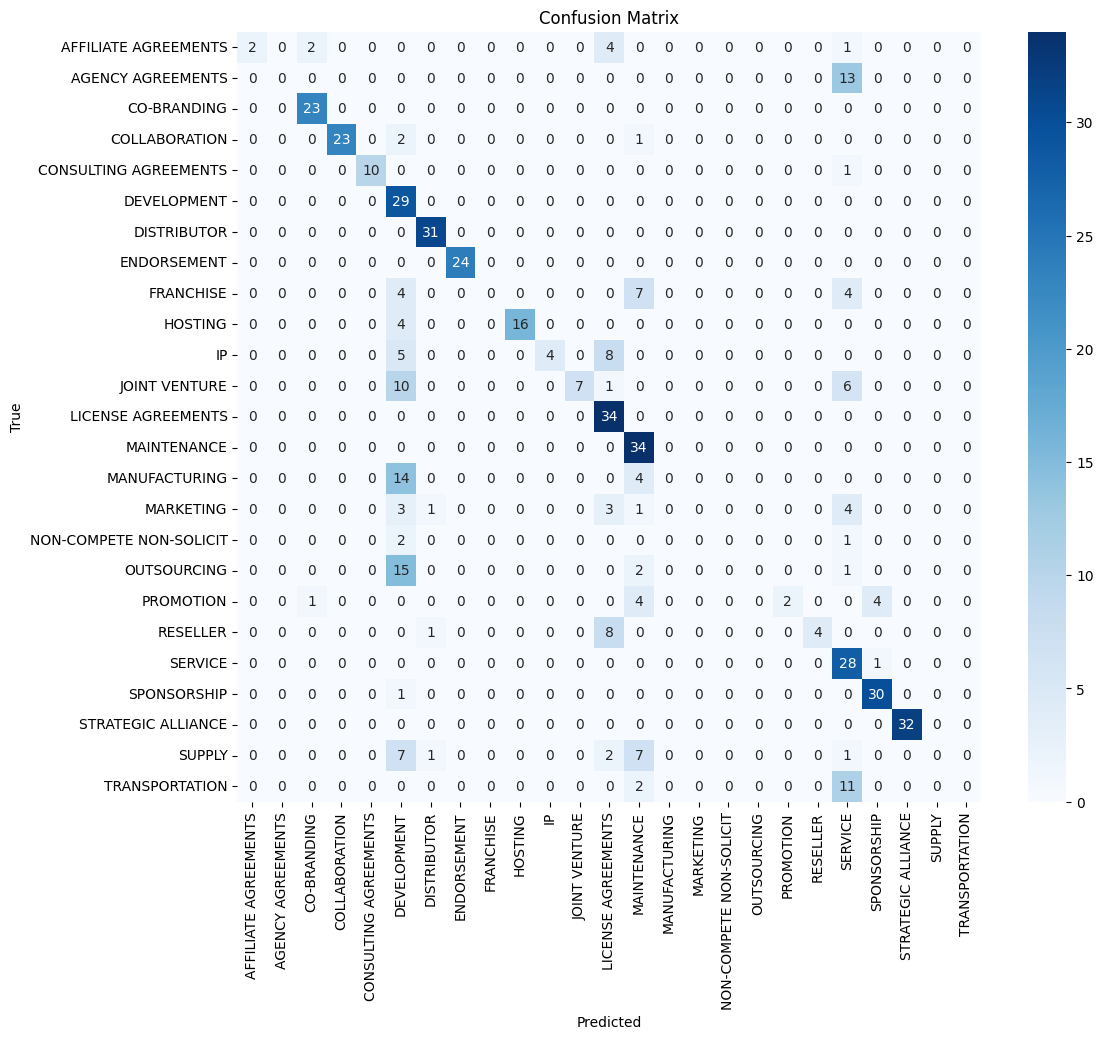

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust column names if yours are different
y_true = merged['category']
y_pred = merged['Predicted Category']

print("Accuracy: {:.2f}%".format(accuracy_score(y_true, y_pred) * 100))
print(classification_report(y_true, y_pred))

# Confusion matrix with all unique classes
labels = sorted(list(set(y_true) | set(y_pred)))
cm = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)*100
precision = precision_score(y_true, y_pred, average='weighted')*100
recall = recall_score(y_true, y_pred, average='weighted')*100
f1 = f1_score(y_true, y_pred, average='weighted')*100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 65.55%
Precision: 63.05%
Recall: 65.55%
F1 Score: 58.36%


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
